In [10]:
!pip install --quiet apache-beam
!pip install apache-beam[interactive]

You should consider upgrading via the '/Users/chenpeng/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/chenpeng/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip show pandas

Name: pandas
Version: 1.0.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /Users/chenpeng/opt/anaconda3/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, seaborn, geopandas, facets-overview, dask-ml


In [7]:
!pip install pandas==1.2.4

     |████████████████████████████████| 10.4 MB 123 kB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
You should consider upgrading via the '/Users/chenpeng/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip show pandas

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /Users/chenpeng/opt/anaconda3/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: statsmodels, seaborn, geopandas, facets-overview, dask-ml


In [1]:
import os, sys
import pandas as pd

dirs = []

dirIr069 = ["ir069/2018/" + i for i in os.listdir("data/ir069/2018")]
dirIr107 = ["ir107/2018/" + i for i in os.listdir("data/ir107/2018")]
dirLght = ["lght/2018/" + i for i in os.listdir("data/lght/2018")]
dirVil = ["vil/2018/" + i for i in os.listdir("data/vil/2018")]
dirVis = ["vis/2018/" + i for i in os.listdir("data/vis/2018")]

dirs = dirIr069 + dirIr107 + dirLght + dirVil + dirVis

dirs = [i for i in dirs if i.endswith(".h5")]
dirs

['ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0630.h5',
 'ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0501_0831.h5',
 'ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0901_1231.h5',
 'ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5',
 'ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5',
 'ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0901_1231.h5',
 'ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5',
 'ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0501_0831.h5',
 'ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0101_0630.h5',
 'ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0101_0430.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1001_1101.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0901_1001.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0701_0801.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0501_0601.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0301_0401.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0801_0901.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0601_0701.h5',
 'lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1101_1201.h5',


In [2]:
def valEvent(eventId, fileName, h5List, valEventId):
    if eventId.startswith("R") and fileName in h5List:
        return 1
    elif eventId in valEventId and fileName in h5List:
        return 1
    else:
        return 0
    
def eventWith5h5(eventId, valEventId):
    if eventId in valEventId:
        return 1
    else:
        return 0

In [6]:
stormEvents_df = pd.read_csv("StormEvents_details-ftp_v1.0_d2018_c20210604.csv.gz")
stormEvents_df["EVENT_ID"] = stormEvents_df["EVENT_ID"].map(lambda x: "S" + str(x))
# stormEvents_df
valEventId = stormEvents_df.EVENT_ID.to_list()
len(valEventId)

62693

In [7]:
catalog_df = pd.read_csv("CATALOG.csv")
catalog_df

/Users/chenpeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
0,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,0,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0
1,R18032505027677,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,1,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.084309,...,36.213723,-87.301535,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0
2,R18032505027721,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,2,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,46.661866,...,50.883159,-120.009277,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.002870,0.005548,0.0
3,R18032516508249,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,3,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,40.883237,...,43.686191,-79.903987,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.029911,0.785600,0.0
4,R18032516507621,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,4,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,44.946047,...,49.169436,-120.575175,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.028560,0.792610,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75999,R19113018467785,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_1101_1201.h5,0,lght,2019-11-30 18:44:00,NaN,NaN,NaN,NaN,34.844928,...,37.936701,-86.429825,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,383499.000000,0.0
76000,R19113018467861,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_1101_1201.h5,0,lght,2019-11-30 18:44:00,NaN,NaN,NaN,NaN,36.192798,...,39.026754,-80.440684,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,383499.000000,0.0
76001,R19113018467863,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_1101_1201.h5,0,lght,2019-11-30 18:44:00,NaN,NaN,NaN,NaN,36.064382,...,39.021576,-83.257717,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,383499.000000,0.0
76002,R19113018468164,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_1101_1201.h5,0,lght,2019-11-30 18:44:00,NaN,NaN,NaN,NaN,40.973362,...,43.191927,-68.026592,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,383499.000000,0.0


In [8]:
catalog_df["ifVal"] = catalog_df.apply(lambda x: valEvent(x["id"], x["file_name"], dirs, valEventId), axis=1)
catalog_df = catalog_df[catalog_df["ifVal"] == 1]
catalog_df

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing,ifVal
0,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,0,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0,1
1,R18032505027677,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,1,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.084309,...,-87.301535,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0,1
2,R18032505027721,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,2,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,46.661866,...,-120.009277,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.002870,0.005548,0.0,1
3,R18032516508249,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,3,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,40.883237,...,-79.903987,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.029911,0.785600,0.0,1
4,R18032516507621,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,4,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,44.946047,...,-120.575175,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.028560,0.792610,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68755,S798689,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-28 03:15:00,NaN,132395.0,798689.0,Lightning,30.532571,...,-86.346000,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,121106.000000,0.0,1
68756,S798711,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-22 07:34:00,NaN,133494.0,798711.0,Flood,43.734369,...,-66.669434,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,231403.000000,0.0,1
68757,S799001,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-01 22:30:00,NaN,133553.0,799001.0,Funnel Cloud,43.121473,...,-121.298291,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,99619.000000,0.0,1
68758,S802216,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-24 15:00:00,NaN,134012.0,802216.0,Heavy Rain,38.280473,...,-118.988913,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,144524.000000,0.0,1


In [9]:
# Desired image types
types = set(['vis','ir069','ir107','vil','lght'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog_df.groupby('id').filter(lambda x: types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),types)

Found 2935 events matching {'vil', 'ir107', 'vis', 'ir069', 'lght'}


In [10]:
catalog_df["ifVal"] = catalog_df.apply(lambda x: eventWith5h5(x["id"], event_ids), axis=1)
catalog_df = catalog_df[catalog_df["ifVal"] == 1]
del catalog_df["ifVal"]
catalog_df

/Users/chenpeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
0,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,0,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0
1,R18032505027677,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,1,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.084309,...,36.213723,-87.301535,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0
2,R18032505027721,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,2,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,46.661866,...,50.883159,-120.009277,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.002870,0.005548,0.0
3,R18032516508249,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,3,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,40.883237,...,43.686191,-79.903987,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.029911,0.785600,0.0
4,R18032516507621,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,4,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,44.946047,...,49.169436,-120.575175,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.028560,0.792610,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68180,S794783,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1101_1201.h5,0,lght,2018-11-13 09:45:00,NaN,132836.0,794783.0,Tornado,33.379527,...,35.935785,-74.163246,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,112597.000000,0.0
68181,S794819,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1101_1201.h5,0,lght,2018-11-24 19:50:00,NaN,132837.0,794819.0,Thunderstorm Wind,33.714373,...,36.248911,-73.735030,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,208793.000000,0.0
68726,S791686,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-01 04:49:00,NaN,132310.0,791686.0,Thunderstorm Wind,33.749329,...,37.082502,-92.562285,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,116386.000000,0.0
68734,S793422,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-01 05:17:00,NaN,132590.0,793422.0,Thunderstorm Wind,31.341200,...,34.716541,-93.667049,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,112619.000000,0.0


In [11]:
from collections import Counter
list_ = catalog_df.id.to_list()
d = Counter(list_)
d

Counter({'R18032505027684': 9,
         'R18032505027677': 5,
         'R18032505027721': 5,
         'R18032516508249': 5,
         'R18032516507621': 5,
         'R18032516508005': 5,
         'R18032516508688': 5,
         'R18032516507720': 5,
         'R18032516507955': 5,
         'R18032810357425': 5,
         'R18032810357459': 5,
         'R18032810357525': 5,
         'R18032810357497': 5,
         'R18032216107876': 5,
         'R18032216107750': 5,
         'R18032216107338': 5,
         'R18032216107425': 5,
         'R18032216107405': 5,
         'R18032216107389': 5,
         'R18032216107419': 5,
         'R18032216107415': 5,
         'R18032512558339': 5,
         'R18032512558354': 5,
         'R18032512558034': 5,
         'R18032512557707': 5,
         'R18032412557623': 5,
         'R18032412558096': 5,
         'R18032412558183': 5,
         'R18032412557870': 5,
         'R18032414177679': 5,
         'R18032414178237': 5,
         'R18032414177506': 5,
        

In [12]:
res = []
for k, v in d.items():
    if v < 5:
        res.append(k)
        
res

[]

In [13]:
catalog_df[catalog_df["id"] == "R18032505027684"]

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
0,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,0,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.000000
82,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,82,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.182653,...,36.340467,-88.015706,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.000000
865,R18032505027684,ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0101_...,504,ir107,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.182653,...,36.340467,-88.015706,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-49.568752,15.690057,0.000000
867,R18032505027684,ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0101_...,506,ir107,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-52.487610,15.613359,0.000000
3131,R18032505027684,ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_...,496,ir069,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.182653,...,36.340467,-88.015706,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-59.289093,-15.741784,0.000000
3133,R18032505027684,ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_...,498,ir069,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-55.718784,-15.779508,0.000000
31126,R18032505027684,vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5,1173,vil,2018-03-25 05:02:30,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.182653,...,36.340467,-88.015706,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,219.000000,0.546938
31128,R18032505027684,vil/2018/SEVIR_VIL_RANDOMEVENTS_2018_0101_0430.h5,1175,vil,2018-03-25 05:02:30,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,219.000000,0.546938
61889,R18032505027684,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_0301_0401.h5,0,lght,2018-03-25 05:00:00,NaN,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,56749.000000,0.000000


In [14]:
catalog_df.to_csv("CATALOG_new.csv", index = False)

In [63]:
def stormDict(fields):
#     delIndex = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 17, 19, 48, 49, 50]
    delIndex = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 17, 19, 50]
    return [fields[i] for i in range(len(fields)) if i not in delIndex]

def combine(fields, stormEvent):
    if fields[0] != 'id' and len(fields) == 21:
        if fields[0].startswith("S"):
            eventId = fields[0]
            fields.extend(stormEvent[eventId])
            yield fields
        else:
            fields.extend([""] * 37)
            yield fields
    elif fields[0] == 'id':
        fields.extend(stormEvent["SEVENT_ID"])
        yield fields

def float2geo(fields):
    delIndex = [9, 10, 11, 12, 52, 53, 54, 55]
    if fields[0] != 'id' and len(fields) == 58:
        for i in [9, 11, 52, 54]:
            p = str('Point(' + fields[i + 1] + ',' + fields[i] + ')')
            if len(p) > 16:
                fields.append(p)
            else:
                fields.append('')
    elif fields[0] == 'id':
        fields.append('llcrnr')
        fields.append('urcrnr')
        fields.append('BEGIN_loc')
        fields.append('END_loc')

    fields = [fields[i] for i in range(len(fields)) if i not in delIndex]
    return fields

In [66]:
import apache_beam as beam
import csv

with beam.Pipeline() as pipeline:
    stormEvents = (pipeline
                   | 'StormEvents Read' >> beam.io.ReadFromText('StormEvents_details-ftp_v1.0_d2018_c20210604.csv.gz')
                   | 'StormEvents Fields' >> beam.Map(lambda line: next(csv.reader([line])))
                   | 'StormEvents Dictionary' >> beam.Map(lambda fields: ("S" + fields[7], stormDict(fields)))
                   )

    catalog = (pipeline
                | 'Catalog Read' >> beam.io.ReadFromText('CATALOG_new.csv')
                | 'Catalog Fields' >> beam.Map(lambda line: next(csv.reader([line])))
                | 'Data Combine' >> beam.FlatMap(combine, beam.pvalue.AsDict(stormEvents))
                | 'Data ToGeography' >> beam.Map(lambda fields: float2geo(fields))
                | 'Data Tostring' >> beam.Map(lambda fields: '^'.join(fields))
                | 'Data WriteToCSV' >> beam.io.WriteToText('afterPipeline', file_name_suffix='.csv') 
#                 | 'Data WriteToBigQuery' >> beam.io.WriteToBigQuery(
#                     events_output, schema=schema,
#                     write_disposition=beam.io.BigQueryDisposition.WRITE_TRUNCATE,
#                     create_disposition=beam.io.BigQueryDisposition.CREATE_IF_NEEDED)
              )
    
#     valEventId | beam.Map(print)
#     catalog | beam.Map(print)
#     stormEvents | beam.Map(print)

In [67]:
afterPipeline = pd.read_csv("afterPipeline-00000-of-00001.csv", sep = "^")
afterPipeline

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,proj,...,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,EPISODE_NARRATIVE,EVENT_NARRATIVE,llcrnr,urcrnr,BEGIN_loc,END_loc
0,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,0,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,NaN,NaN,NaN,NaN,NaN,NaN,"Point(-91.63513190131886,33.21670814855361, 4326)","Point(-87.0702543069705,36.3366268252932, 4326)",NaN,NaN
1,R18032505027677,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,1,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,NaN,NaN,NaN,NaN,NaN,NaN,"Point(-91.84943468096128,33.08430875152969, 4326)","Point(-87.30153494687403,36.21372277756191, 4326)",NaN,NaN
2,R18032505027721,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,2,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,NaN,NaN,NaN,NaN,NaN,NaN,"Point(-123.5099276555353,46.66186552772163, 4326)","Point(-120.0092768117858,50.88315859086983, 4326)",NaN,NaN
3,R18032516508249,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,3,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,NaN,NaN,NaN,NaN,NaN,NaN,"Point(-85.3502131379754,40.88323725084385, 4326)","Point(-79.90398708189866,43.68619148789182, 4326)",NaN,NaN
4,R18032516507621,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,4,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,NaN,NaN,NaN,NaN,NaN,NaN,"Point(-123.9729353657757,44.94604699567005, 4326)","Point(-120.57517510266024,49.16943648382993, 4...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,S794783,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1101_1201.h5,0,lght,2018-11-13 09:45:00,NaN,132836.0,794783.0,Tornado,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,ATLANTIC BEACH,0.0,WNW,MOREHEAD CITY,A supercell thunderstorm came ashore across Ca...,The damage path started along Club Colony Driv...,"Point(-79.21277993672494,33.379526591581914, 4...","Point(-74.16324551390291,35.93578450206832, 4326)","Point(-76.7163,34.6963, 4326)","Point(-76.7065,34.7233, 4326)"
14727,S794819,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1101_1201.h5,0,lght,2018-11-24 19:50:00,NaN,132837.0,794819.0,Thunderstorm Wind,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,ROE,3.0,NNW,ROE,A supercell thunderstorm came ashore in Carter...,Cedar Island Ferry Terminal reported a wind gu...,"Point(-78.82431050987991,33.714372501836, 4326)","Point(-73.73502983855866,36.24891071731131, 4326)","Point(-76.316,35.0171, 4326)","Point(-76.316,35.0171, 4326)"
14728,S791686,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-01 04:49:00,NaN,132310.0,791686.0,Thunderstorm Wind,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,SALLISAW ARPT,1.0,N,SALLISAW ARPT,A strong low pressure trough translated from t...,The Oklahoma Mesonet station near Sallisaw mea...,"Point(-96.9407335092707,33.749328523324635, 4326)","Point(-92.56228506599814,37.082502135626726, 4...","Point(-94.7981,35.4382, 4326)","Point(-94.7981,35.4382, 4326)"
14729,S793422,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1201_0101.h5,0,lght,2018-12-01 05:17:00,NaN,132590.0,793422.0,Thunderstorm Wind,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,...,MILLER GROVE,2.0,N,MILLER GROVE,A strong upper level disturbance kicked off a ...,Hopkins County Sheriff's Department reported a...,"Point(-97.87385736668806,31.34119978721981, 4326)","Point(-93.66704864234109,34.71654098287048, 4326)","Point(-95.8,33.06, 4326)","Point(-95.8,33.06, 4326)"


In [40]:
afterPipeline.dtypes

id                     object
file_name              object
file_index              int64
img_type               object
time_utc               object
minute_offsets         object
episode_id            float64
event_id              float64
event_type             object
llcrnrlat             float64
llcrnrlon             float64
urcrnrlat             float64
urcrnrlon             float64
proj                   object
size_x                  int64
size_y                  int64
height_m              float64
width_m               float64
data_min              float64
data_max              float64
pct_missing           float64
STATE                  object
STATE_FIPS            float64
CZ_TYPE                object
CZ_FIPS               float64
CZ_NAME                object
WFO                    object
CZ_TIMEZONE            object
INJURIES_DIRECT       float64
INJURIES_INDIRECT     float64
DEATHS_DIRECT         float64
DEATHS_INDIRECT       float64
DAMAGE_PROPERTY        object
DAMAGE_CRO

In [5]:
# Enter path to the SEVIR data location
DATA_PATH    = 'data'
CATALOG_PATH = 'CATALOG.csv' 

# On some Linux systems setting file locking to false is also necessary:
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE' 

Event ID: b'S728503'
Image shape: (384, 384, 49)


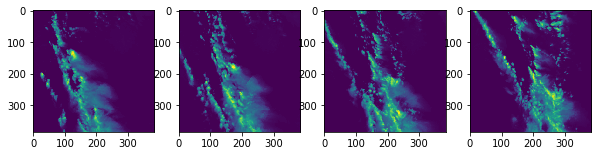

In [63]:
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
 
file_index = 0
with h5py.File('%s/vil/2018/SEVIR_VIL_STORMEVENTS_2018_0101_0630.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(vil[:,:,10])
axs[1].imshow(vil[:,:,20])
axs[2].imshow(vil[:,:,30])
axs[3].imshow(vil[:,:,40])
plt.show()

In [48]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

catalog["year_"] = catalog['time_utc'].apply(lambda x: x.year)
catalog = catalog[catalog["year_"] == 2018]
del catalog["year_"]

catalog["month_"] = catalog['time_utc'].apply(lambda x: x.month)
catalog = catalog[catalog["month_"] < 12]
del catalog["month_"]

# Desired image types
img_types = set(['vis','ir069','ir107','vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

# Grab a sample event and view catalog entries
sample_event = events.get_group(event_ids[-1])
print('Sample Event:', event_ids[-1])
sample_event

Found 5737 events matching {'vil', 'ir107', 'ir069', 'vis'}
Sample Event: S794819


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
15458,S794819,vil/2018/SEVIR_VIL_STORMEVENTS_2018_0701_1231.h5,425,vil,2018-11-24 19:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,132837.0,794819.0,Thunderstorm Wind,33.714373,...,36.248911,-73.73503,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.0
16329,S794819,ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1...,449,ir107,2018-11-24 19:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,132837.0,794819.0,Thunderstorm Wind,33.714373,...,36.248911,-73.73503,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-67.093735,21.547569,0.0
19276,S794819,vis/2018/SEVIR_VIS_STORMEVENTS_2018_1101_1130.h5,18,vis,2018-11-24 19:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,132837.0,794819.0,Thunderstorm Wind,33.714373,...,36.248911,-73.73503,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.000365,1.123036,0.0
37957,S794819,ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1...,449,ir069,2018-11-24 19:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,132837.0,794819.0,Thunderstorm Wind,33.714373,...,36.248911,-73.73503,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-67.901573,-11.079488,0.0
68181,S794819,lght/2018/SEVIR_LGHT_ALLEVENTS_2018_1101_1201.h5,0,lght,2018-11-24 19:50:00,NaN,132837.0,794819.0,Thunderstorm Wind,33.714373,...,36.248911,-73.73503,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,208793.000000,0.0


(<matplotlib.image.AxesImage at 0x7fc9f890d790>, Text(0.5, 1.0, 'VIL'))

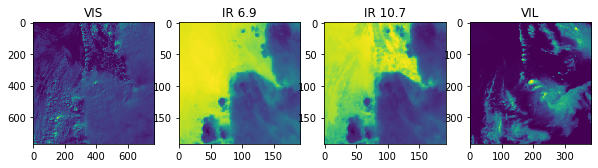

In [53]:
def read_data( sample_event, img_type, data_path=DATA_PATH ):
    """
    Reads single SEVIR event for a given image type.
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    img_type   str
        SEVIR image type
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array
       LxLx49 tensor containing event data
    """
    fn = sample_event[sample_event.img_type==img_type].squeeze().file_name
    fi = sample_event[sample_event.img_type==img_type].squeeze().file_index
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi] 
    return data

vis = read_data(sample_event, 'vis')
ir069 = read_data(sample_event, 'ir069')
ir107 = read_data(sample_event, 'ir107')
vil = read_data(sample_event, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')

(<matplotlib.image.AxesImage at 0x7fca19d15ad0>, Text(0.5, 1.0, 'Lightning'))

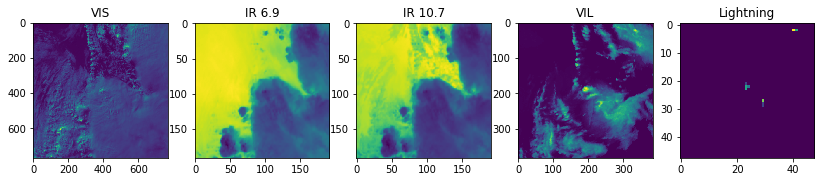

In [55]:
import numpy as np
def lght_to_grid(data):
    """
    Converts SEVIR lightning data stored in Nx5 matrix to an LxLx49 tensor representing
    flash counts per pixel per frame
    
    Parameters
    ----------
    data  np.array
       SEVIR lightning event (Nx5 matrix)
       
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts
    """
    FRAME_TIMES = np.arange(-120.0,125.0,5) * 60 # in seconds
    out_size = (48,48,len(FRAME_TIMES))
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # filter out points outside the grid
    x,y=data[:,3],data[:,4]
    m=np.logical_and.reduce( [x>=0,x<out_size[0],y>=0,y<out_size[1]] )
    data=data[m,:]
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # Filter/separate times
    # compute z coodinate based on bin locaiton times
    t=data[:,0]
    z=np.digitize(t,FRAME_TIMES)-1
    z[z==-1]=0 # special case:  frame 0 uses lght from frame 1

    x=data[:,3].astype(np.int64)
    y=data[:,4].astype(np.int64)

    k=np.ravel_multi_index(np.array([y,x,z]),out_size)
    n = np.bincount(k,minlength=np.prod(out_size))
    return np.reshape(n,out_size).astype(np.float32)

def read_lght_data( sample_event, data_path=DATA_PATH ):
    """
    Reads lght data from SEVIR and maps flash counts onto a grid  
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts for selected event
    
    """
    fn = sample_event[sample_event.img_type=='lght'].squeeze().file_name
    id = sample_event[sample_event.img_type=='lght'].squeeze().id
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data      = hf[id][:] 
    return lght_to_grid(data)

lght = read_lght_data(sample_event)

# include lightning counts in plot
fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx]), axs[4].set_title('Lightning')

(<matplotlib.image.AxesImage at 0x7fca48792d10>, Text(0.5, 1.0, 'Lightning'))

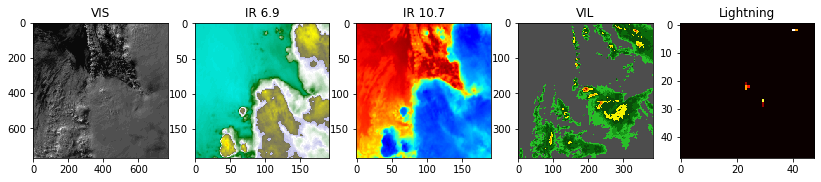

In [58]:
import sys
sys.path.append('../') # add sevir module to path
from sevir.display import get_cmap
# Get colormaps for encoded types
vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)
lght_cmap,lght_norm,lght_vmin,lght_vmax = get_cmap('lght',encoded=True)

fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm,vmin=vis_vmin,vmax=vis_vmax), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx],cmap=lght_cmap,norm=lght_norm,vmin=lght_vmin,vmax=lght_vmax), axs[4].set_title('Lightning')

In [59]:
sample_event.proj.values[0]

'+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=6370997.0 +ellps=sphere '

In [60]:
import re
import numpy as np
class LaeaProjection():
    """
    Translates between pixel coordinates (X,Y) and Lat lon coordinates for a given SEVIR event
    projected in laea.
    
    Parameters
    ----------
    event  pd.Series
        One row from SEVIR catalog
    """
    def __init__(self,event):
        self.proj = event.proj 
        self.lat0 = float(re.compile('\+lat_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.lon0 = float(re.compile('\+lon_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.R = float(re.compile('\+a=(\d+)').search(self.proj).groups()[0])
        self.llcrnlat = event.llcrnrlat
        self.llcrnlon = event.llcrnrlon
        self.refX, self.refY = self.forward(self.llcrnlon,self.llcrnlat,pixel=False)
        self.binX = event.width_m / event.size_x
        self.binY = event.height_m / event.size_y
        
    def forward(self,lon,lat,pixel=True):
        """
        Maps lat/lon to pixel x,y.  For projection coordinates instead of pixel, set pixel=False.
        """
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        k = self.R * np.sqrt(2/(1+sind(self.lat0)*sind(lat)+cosd(self.lat0)*cosd(lat)*cosd(lon-self.lon0)))
        x = k*cosd(lat)*sind(lon-self.lon0)
        y = k*(cosd(self.lat0)*sind(lat) - sind(self.lat0)*cosd(lat)*cosd(lon-self.lon0))
        if pixel:
            x = (x-self.refX) / self.binX
            y = (y-self.refY) / self.binY
        return x,y
    def inverse(self,x,y,pixel=True):
        """
        Maps pixel coordinates to (lon,lat) position.  If passing projection corrdinates, set pixel=False.
        """
        if pixel:
            x = x*self.binX + self.refX
            y = y*self.binY + self.refY
        x/=self.R
        y/=self.R
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        rho = np.sqrt(x*x+y*y)
        c = 2*np.arcsin(0.5*rho)
        sinc = np.sin(c)
        cosc = np.cos(c)
        lat = 180/np.pi*np.arcsin(cosc*sind(self.lat0)+y*sinc*cosd(self.lat0)/rho)
        lon = self.lon0+180/np.pi*np.arctan(x*sinc/(rho*cosd(self.lat0)*cosc - y*sind(self.lat0)*sinc))
        return lon,lat

Text(0.5, 1.0, 'Pixel Longitudes')

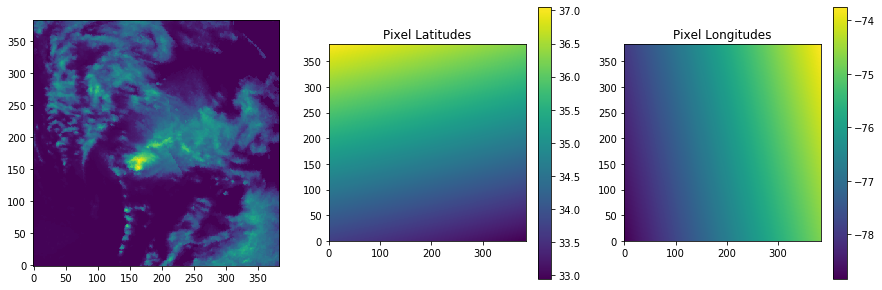

In [61]:
proj = LaeaProjection( sample_event[sample_event.img_type=='vil'].squeeze() )
X,Y = np.meshgrid(np.arange(vil.shape[0]),np.arange(vil.shape[0]))
lons,lats = proj.inverse(X,Y)

# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(vil[:,:,20],origin='lower')
la = ax[1].imshow(lats,origin='lower') 
fig.colorbar(la,ax=ax[1]) 
ax[1].set_title('Pixel Latitudes')
lo = ax[2].imshow(lons,origin='lower') 
fig.colorbar(lo,ax=ax[2]) 
ax[2].set_title('Pixel Longitudes')